In [2]:
# !pip install tqdm
# !pip install joblib

    100% |████████████████████████████████| 51kB 1.0MB/s ta 0:00:01
    100% |████████████████████████████████| 184kB 1.8MB/s ta 0:00:01


In [1]:
%pylab inline
from joblib import load
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", 
        rc={'image.cmap':'viridis','font.size':40, 'pdf.fonttype':42, 'image.interpolation':'none'}, 
        font_scale=1.5)
from sklearn import datasets

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Load the processed data
data_file = "/Users/Joanna/Documents/file2.bin"
mdf = load(data_file)

# mdf['tempdf'].anno.unique(): start happens once per patient
# unknown means they're not being monitored
# Want to predict the rest

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Joanna/Documents/file2.bin'

In [6]:
# Standardize the states we'll look at
modalities = ['accdf','edadf','tempdf']
modname = {'accdf':'Accelerometer','edadf':'Sweat (µsiemens)','tempdf':'Temperature (°C)'}
states = ['still','slow','moderate','vigorous']

In [7]:
# Standardize indexing for different modalities
range_ = {}
mdf['edadf']['data'] = mdf['edadf']['eda_microsiemens']
range_['edadf'] = (0,10) # ranges for what these values could be
mdf['accdf']['data'] = mdf['accdf']['acc_magnitude']
range_['accdf'] = (0,3)
mdf['tempdf']['data'] = mdf['tempdf']['celsius_degrees']
range_['tempdf'] = (10,70)

In [8]:
df = mdf['accdf']
left = df[df.patient==df.patient.unique()[0]][['X','Y','Z','anno']].dropna()
df = mdf['edadf']
right = df[df.patient==df.patient.unique()[0]][['eda_microsiemens','anno']].dropna()

# left & right are???

In [118]:
df = pd.DataFrame()
resample_freq = '1s'
# Sample time domain evenly ^^
# There were two times being given: measurements & annotations
# resample: otherwise measurements don't line up -- accel faster than temp
# essentially do whatever you want

for patient in mdf['accdf'].patient.unique():
    # Get the patient's data
    accdf = mdf['accdf'][mdf['accdf'].patient == patient]
    edadf = mdf['edadf'][mdf['edadf'].patient == patient]
    tempdf = mdf['tempdf'][mdf['tempdf'].patient == patient]
    # read how this works in pandas

    # Resample
    eventdf = accdf[['anno']].copy()
    accdf = accdf[['X','Y','Z']].resample(resample_freq).mean() # need to summarize what happens in those blocks
    edadf = edadf[['eda_microsiemens']].resample(resample_freq).mean()
    tempdf = tempdf[['celsius_degrees']].resample(resample_freq).mean()
    eventdf = eventdf.resample(resample_freq).first()

    # Join 'em
    #df = pd.concat((df,pd.concat((accdf,edadf,tempdf,eventdf),axis=1)),axis=0)
    df = pd.concat((accdf, edadf, tempdf, eventdf), axis=1)
    df.to_csv('/Users/Joanna/Desktop/%s_%s.csv' %(resample_freq, patient))

In [2]:
for patient in mdf['accdf'].patient.unique():
    print(patient)

NameError: name 'mdf' is not defined

In [110]:
df.to_csv('/Users/Joanna/Desktop/%s_resample_dia.csv'%resample_freq)

In [378]:
a = mdf['accdf'].patient.unique()[14]
accdf = mdf['accdf'][mdf['accdf'].patient == a]
edadf = mdf['edadf'][mdf['edadf'].patient == a]
tempdf = mdf['tempdf'][mdf['tempdf'].patient == a]
# read how this works in pandas

# Resample
eventdf = accdf[['anno']].copy()
accdf = accdf[['X','Y','Z']].resample(resample_freq).mean() # need to summarize what happens in those blocks
edadf = edadf[['eda_microsiemens']].resample(resample_freq).mean()
tempdf = tempdf[['celsius_degrees']].resample(resample_freq).mean()
eventdf = eventdf.resample(resample_freq).first()

IndexError: index 14 is out of bounds for axis 0 with size 14

In [ ]:
eventdf.anno.unique()

count = 0
for i in eventdf.anno.unique():
    print(len(eventdf[eventdf.anno == i]))
    print(eventdf.anno.unique()[count])
    count = count + 1;

In [ ]:
eventdf.anno.unique()

count = 0
for annoval in eventdf.anno.unique():
    eventdf[eventdf.anno == annoval] = count;
    count = count + 1;
eventdf.anno.unique()

In [375]:
a = accdf[eventdf.anno == 3]
a = a[~(((a['X'] - 1.041000) < 1e-6) & ((a['Y'] - 0.535000) < 1e-6) & ((a['Z'] - -0.140000) < 1e-6))]
figure(figsize=(20,8))
plot(a.X, '-o')
plot(a.Y, '-o')
plot(a.Z, '-o')

# slow

ValueError: ordinal must be >= 1

In [376]:
b = accdf[eventdf.anno == 4]
b = b[~(((b['X'] - 1.041000) < 1e-6) & ((b['Y'] - 0.535000) < 1e-6) & ((b['Z'] - -0.140000) < 1e-6))]
figure(figsize=(20,8))
plot(b.X, '-o')
plot(b.Y, '-o')
plot(b.Z, '-o')

# moderate

ValueError: ordinal must be >= 1

In [377]:
c = accdf[eventdf.anno == 6]
c = c[~(((c['X'] - 1.041000) < 1e-6) & ((c['Y'] - 0.535000) < 1e-6) & ((c['Z'] - -0.140000) < 1e-6))]
figure(figsize=(20,8))
plot(c.X, '-o')
plot(c.Y, '-o')
plot(c.Z, '-o')

# vigorous

ValueError: ordinal must be >= 1

In [371]:
#slowstd = []
#moderatestd = []
#vigorousstd = []

slowstd = np.append(slowstd, [[np.std(a.X), np.std(a.Y), np.std(a.Z)]], axis = 0)
moderatestd = np.append(moderatestd, [[np.std(b.X), np.std(b.Y), np.std(b.Z)]], axis = 0)
vigorousstd = np.append(vigorousstd, [[np.std(c.X), np.std(c.Y), np.std(c.Z)]], axis = 0)

In [379]:
moderatestd

array([[ 0.4117083 ,  0.73567263,  0.4265566 ],
       [ 0.47423786,  0.43844855,  0.45134427],
       [ 0.53031681,  0.30648145,  0.76147911],
       [ 0.04114706,  0.01729674,  0.0119129 ],
       [ 0.24434459,  0.48221172,  0.44906821],
       [ 0.3796614 ,  0.33887113,  0.38109757],
       [ 0.43610782,  0.60849938,  0.5468459 ],
       [ 0.45099013,  0.56274042,  0.61430192],
       [ 0.47660347,  0.56124819,  0.35340031],
       [ 0.33665123,  0.65283323,  0.30518284],
       [ 0.40381246,  0.44135521,  0.39004779],
       [ 0.44542788,  0.60275123,  0.3228241 ]])

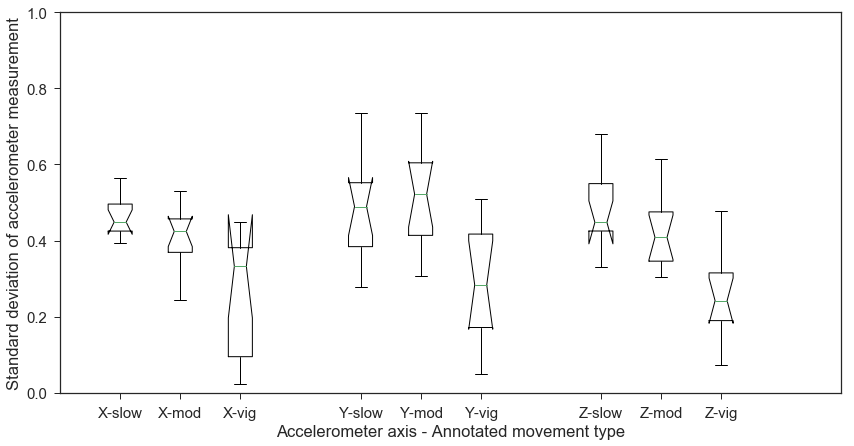

In [436]:
fig = plt.figure()
fig.set_size_inches(14, 7)
fig
bp = plt.boxplot((slowstd[:,0], moderatestd[:,0], vigorousstd[:, 0]), notch = True, positions = [2, 3, 4], widths = .4);
bp = plt.boxplot((slowstd[:, 1], moderatestd[:, 1], vigorousstd[:, 1]), notch = True, positions = [6, 7, 8], widths = .4);
plt.boxplot((slowstd[:,2], moderatestd[:, 2], vigorousstd[:, 2]), notch = True, positions = [10, 11, 12], widths = .4);
ylim(0, 1);
xlim(1, 14);
plt.xticks([2, 3, 4, 6, 7,8, 10, 11, 12], ['X-slow', 'X-mod', 'X-vig', 'Y-slow', 'Y-mod', 'Y-vig', 'Z-slow', 'Z-mod', 'Z-vig']);

xlabel("Accelerometer axis - Annotated movement type");
ylabel("Standard deviation of accelerometer measurement")

In [ ]:
bp = boxplot(A, positions = [1, 2], widths = 0.6)
setBoxColors(bp)

# second boxplot pair
bp = boxplot(B, positions = [4, 5], widths = 0.6)
setBoxColors(bp)

# thrid boxplot pair
bp = boxplot(C, positions = [7, 8], widths = 0.6)
setBoxColors(bp)

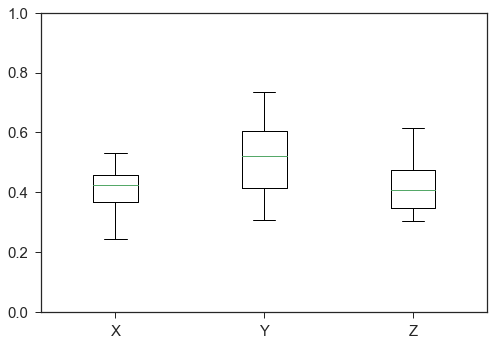

In [386]:
plt.figure()
plt.boxplot((moderatestd[:,0], moderatestd[:, 1], moderatestd[:, 2]));
ylim(0, 1);
plt.xticks([1, 2, 3], ['X', 'Y', 'Z']);

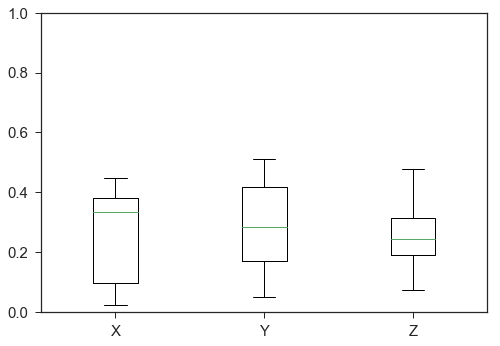

In [387]:
plt.figure()
plt.boxplot((vigorousstd[:,0], vigorousstd[:, 1], vigorousstd[:, 2]));
ylim(0,1);
plt.xticks([1, 2, 3], ['X', 'Y', 'Z']);

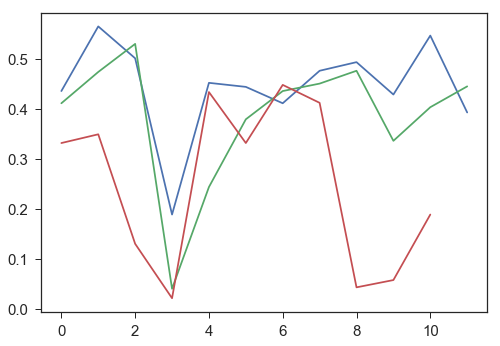

In [403]:
plt.figure()

plot(slowstd[:,0]);
plot(moderatestd[:, 0]);
plot(vigorousstd[:,0]);

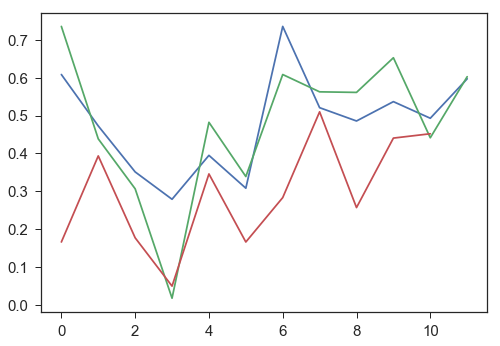

In [404]:
plt.figure()

plot(slowstd[:,1]);
plot(moderatestd[:, 1]);
plot(vigorousstd[:,1]);

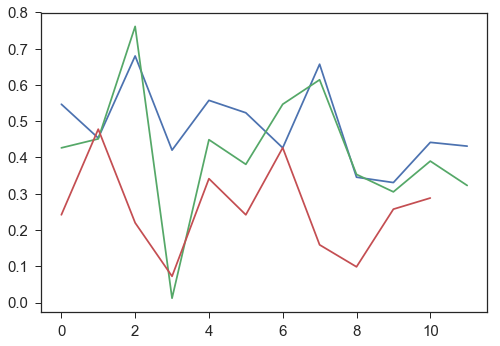

In [405]:
plt.figure()

plot(slowstd[:,2]);
plot(moderatestd[:, 2]);
plot(vigorousstd[:,2]);

(-0.5, 623.5, 0.5, -0.5)

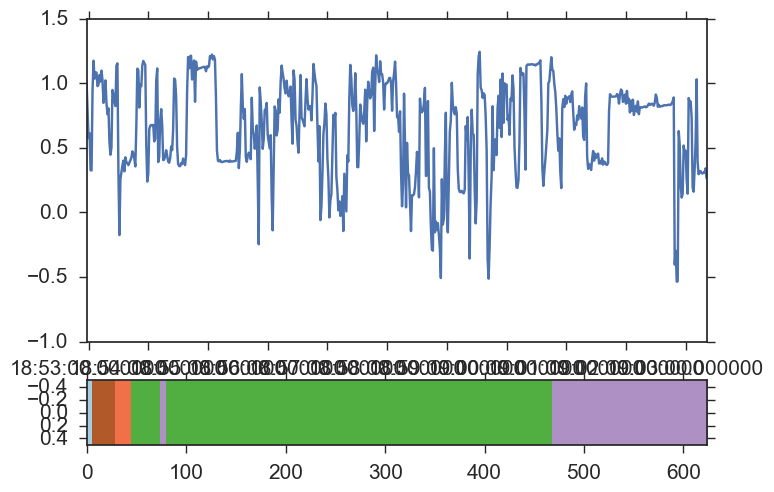

In [388]:
c = 'X'
s = ok.index[0],ok.index[20000]
gs = GridSpec(2,1,height_ratios=[5,1])
subplot(gs[0])
what_ = what[s[0]:s[1]][c]
plot(what_)
subplot(gs[1])
codes = pd.Categorical(what['anno']).codes
imshow(codes[None,0:len(what_)],cmap='Paired',interpolation='nearest')
axis('tight')

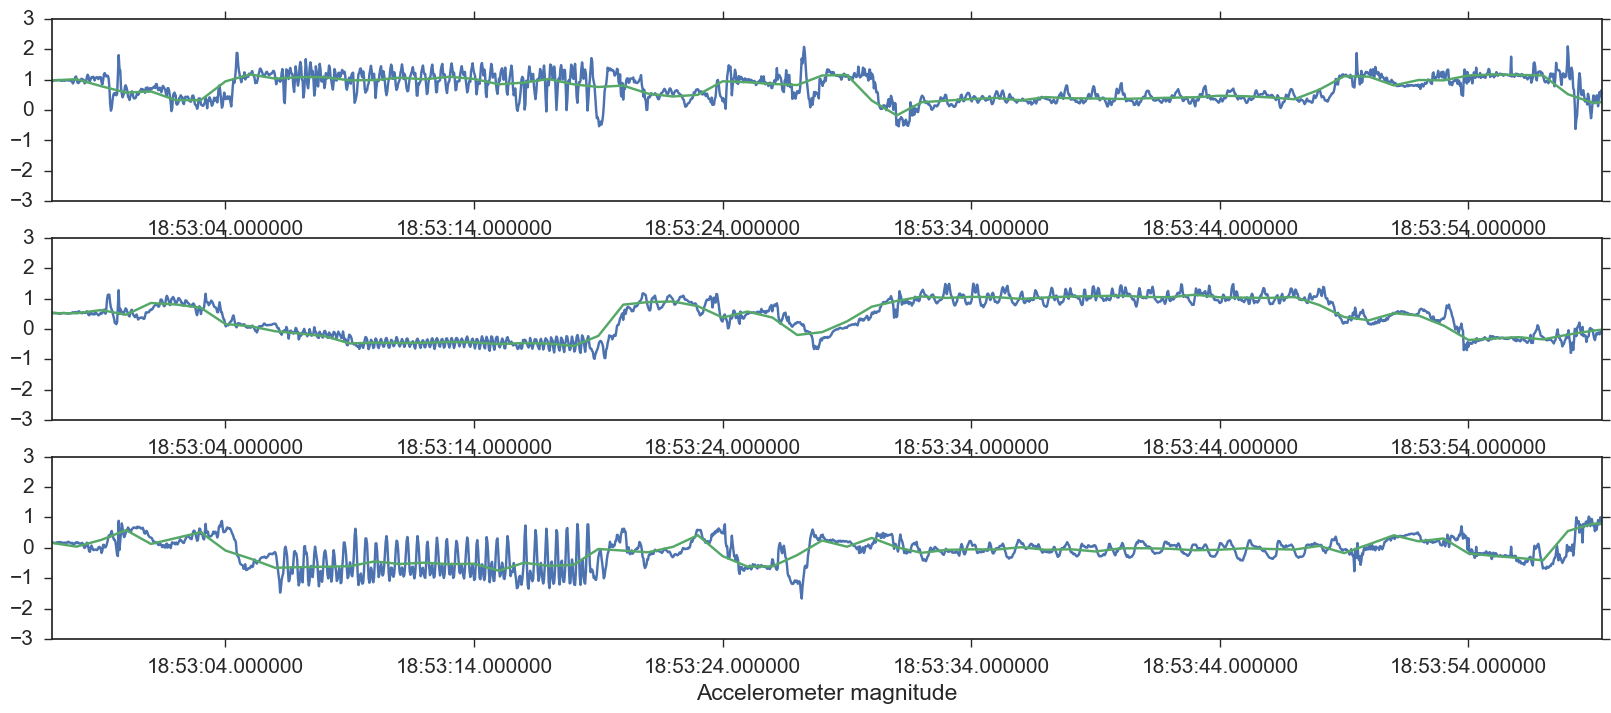

In [346]:
figure(figsize=(20,8))
gs = GridSpec(3,1)
for i,c in enumerate(['X','Y','Z']):
    subplot(gs[i])
    plot(ok[c],label=c)
    plot(what[c])
    xlim(ok.index[0],ok.index[2000])
    ylim(-3,3)
xlabel("Accelerometer magnitude")

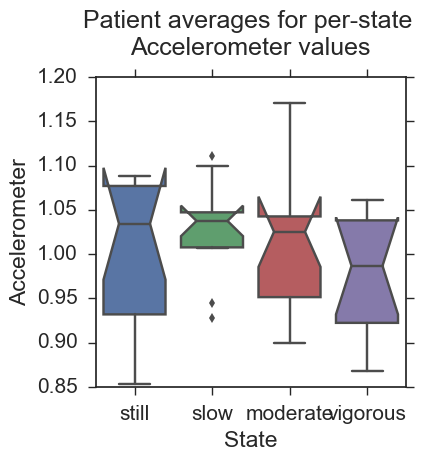

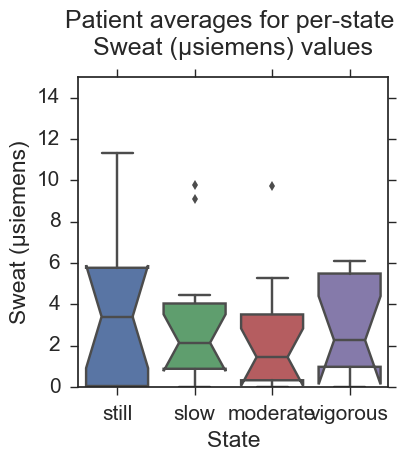

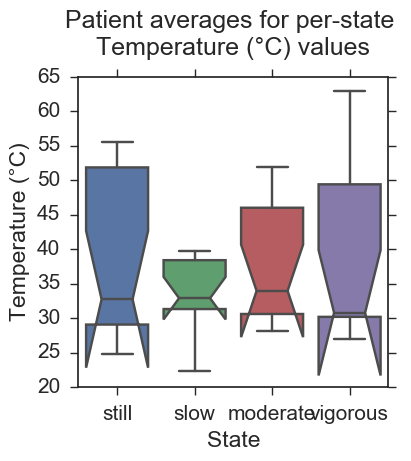

In [229]:
for modality in modalities:
    figure(figsize=(4,4))
    df = mdf[modality]
    gdf = df.groupby(['patient','anno']).mean().reset_index().dropna()
    gdf = gdf[gdf.anno.str.contains('|'.join(states))]
    sns.boxplot(x='anno',y='data',data=gdf,order=states,notch=True)
    ylabel(modname[modality])
    xlabel("State")
    title("Patient averages for per-state \n%s values" % modname[modality],
         y=1.05)
    if modality == 'edadf':
        ylim(0,15)

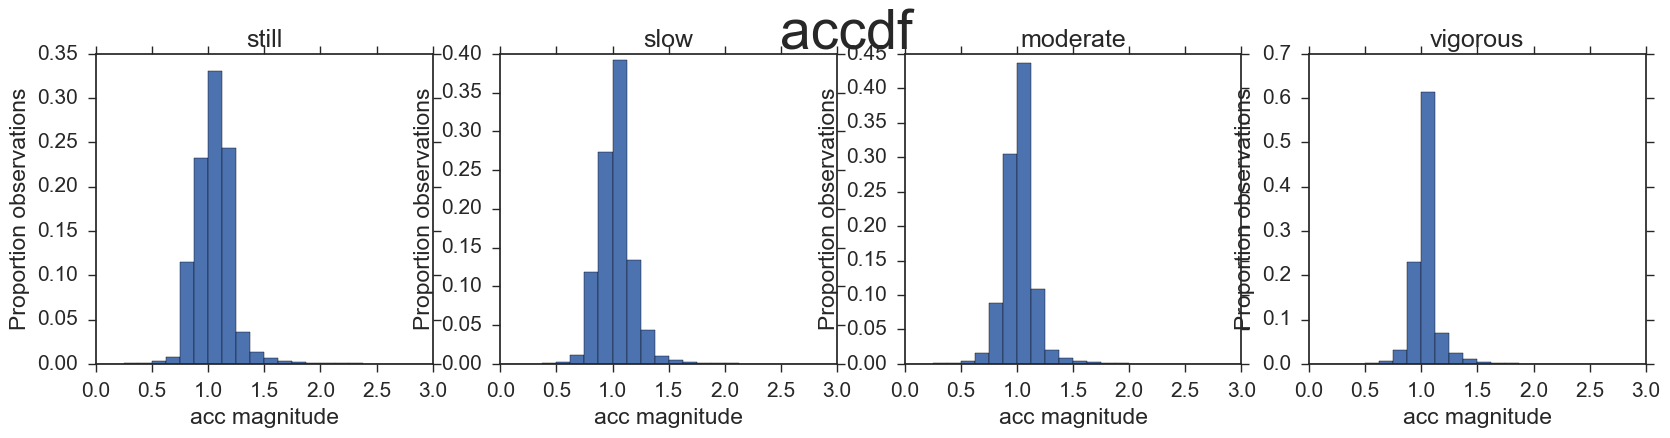

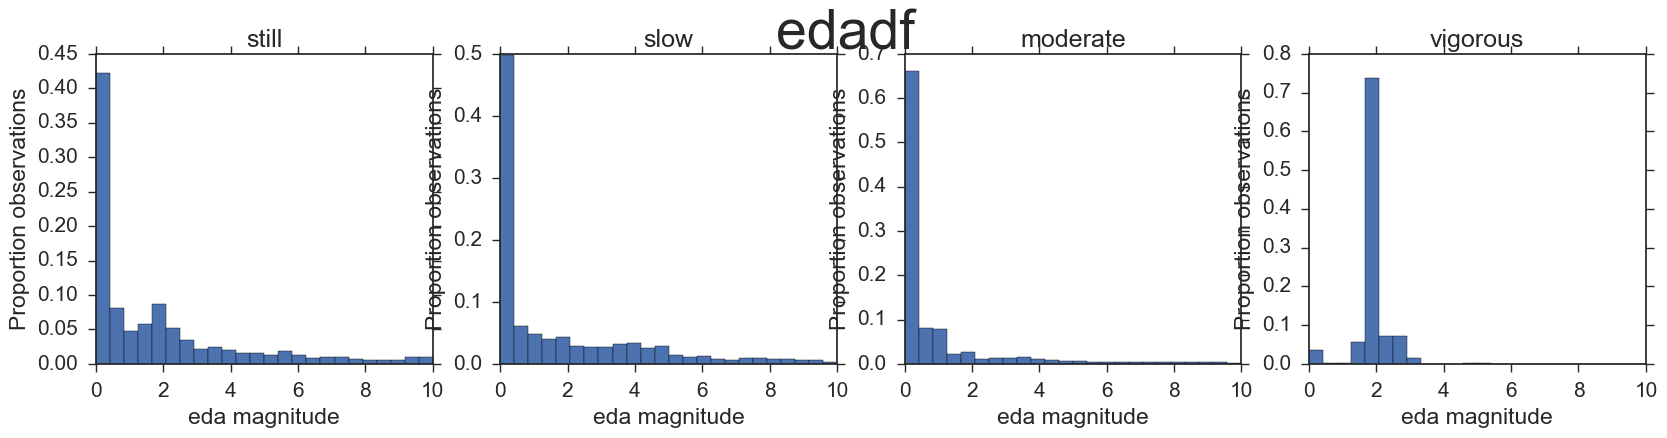

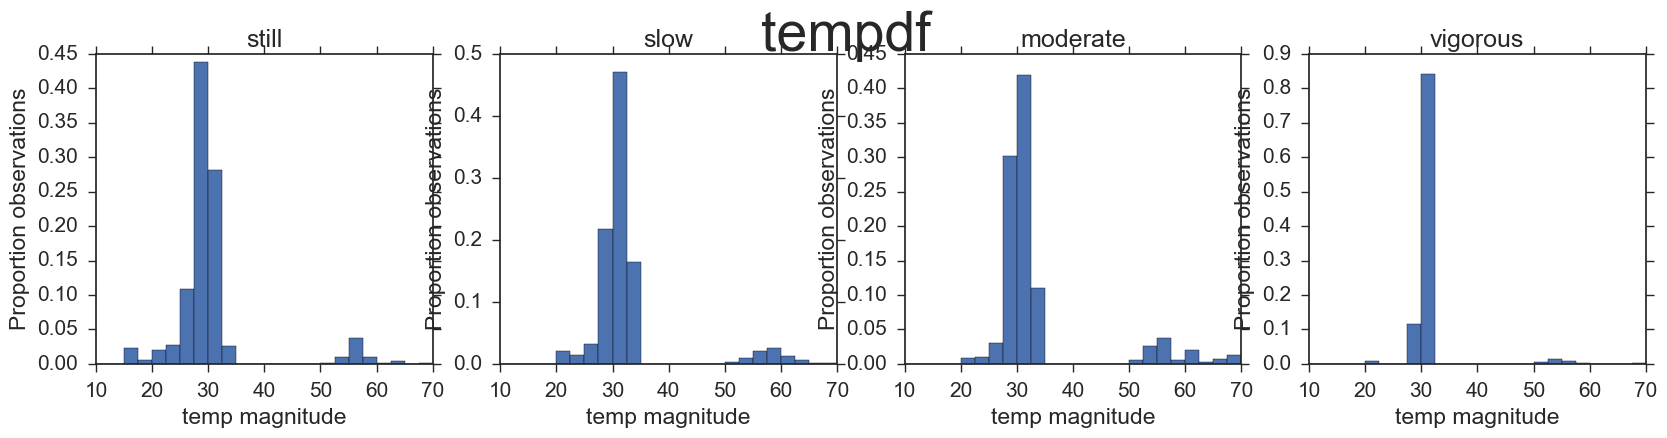

In [170]:
# We want to know the distribution of each modality in each state label.
for modality in modalities:
    df = mdf[modality]
    figure(figsize=(20,4))
    gs = GridSpec(1,4)
    x = np.linspace(*range_[modality],25)
    for i,state in enumerate(states):
        subplot(gs[i])
        vals = df[df.anno==state].data.dropna().values
        y,_ = np.histogram(vals,bins=x)
        y = y.astype('float32') / y.sum()
        bar(x[:-1],y,width=x[1]-x[0])
        xlabel("%s magnitude" % modality[:-2])
        ylabel("Proportion observations")
        title(state)
    suptitle(modality,y=1.01)

In [ ]:
# We want to know if the agitation means make the states separable (plot them)

In [ ]:
# We want to know if some embedding of the agitation distribution makes state separable (embed and plot them)

In [ ]:
# We want to know if we can accurately classify what state you're in based on actigraphy data